# Preliminary Model Build for Mockup

In [30]:
# Import Warnings and Dependencies
import warnings
warnings.filterwarnings('ignore')
# Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pathlib import Path
from collections import Counter

## Building Model
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Data to Load

In [3]:
# Load in Data
file_path = Path("..\Data\Model_Data\combined_data_w_pricecut.csv") 
# Pulled in cleaned combined_data from SQL database directly
housing_data_df = pd.read_csv(file_path)
housing_data_df


,region_id,region_desc,week,sales_inventory,civilian_labor_force,employment,unemployment,unemployment_rate,med_house_price,rent_index,sales_count,price_cut
0,394463,"Chicago, IL",3/31/2018,38581,4963614.0,4753730.0,209884.0,4.2,284600,1610.46,9053,9100.0
1,394463,"Chicago, IL",4/30/2018,42253,4960889.0,4756797.0,204092.0,4.1,294600,1622.52,11208,10000.0
2,394463,"Chicago, IL",5/31/2018,45757,4959982.0,4759532.0,200450.0,4.0,300600,1634.70,13708,10000.0
3,394463,"Chicago, IL",6/30/2018,47492,4961285.0,4762416.0,198869.0,4.0,302267,1645.26,15524,9652.5
4,394463,"Chicago, IL",7/31/2018,48984,4964193.0,4765720.0,198473.0,4.0,301967,1651.54,14358,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
270,394902,"Nashville, TN",5/31/2022,4590,1138543.0,1107909.0,30634.0,2.7,479967,1860.25,3382,20000.0
271,394902,"Nashville, TN",6/30/2022,5436,1139523.0,1108733.0,30790.0,2.7,494966,1884.61,3700,20000.0
272,394902,"Nashville, TN",7/31/2022,6341,1137422.0,1106593.0,30829.0,2.7,498300,1910.61,3041,20000.0
273,394902,"Nashville, TN",8/31/2022,7106,1134574.0,1103911.0,30663.0,2.7,499633,1923.84,2859,19600.0


In [4]:
# Check data types
housing_data_df.dtypes

region_id                 int64
region_desc              object
week                     object
sales_inventory           int64
civilian_labor_force    float64
employment              float64
unemployment            float64
unemployment_rate       float64
med_house_price           int64
rent_index              float64
sales_count               int64
price_cut               float64
dtype: object

In [5]:
#housing_data_cleaned = housing_data_df.drop(housing_data_df.index[[54,109,164,219,274]])
housing_data_cleaned = housing_data_df.dropna()
housing_data_cleaned.shape
housing_data_cleaned

,region_id,region_desc,week,sales_inventory,civilian_labor_force,employment,unemployment,unemployment_rate,med_house_price,rent_index,sales_count,price_cut
0,394463,"Chicago, IL",3/31/2018,38581,4963614.0,4753730.0,209884.0,4.2,284600,1610.46,9053,9100.0
1,394463,"Chicago, IL",4/30/2018,42253,4960889.0,4756797.0,204092.0,4.1,294600,1622.52,11208,10000.0
2,394463,"Chicago, IL",5/31/2018,45757,4959982.0,4759532.0,200450.0,4.0,300600,1634.70,13708,10000.0
3,394463,"Chicago, IL",6/30/2018,47492,4961285.0,4762416.0,198869.0,4.0,302267,1645.26,15524,9652.5
4,394463,"Chicago, IL",7/31/2018,48984,4964193.0,4765720.0,198473.0,4.0,301967,1651.54,14358,9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
269,394902,"Nashville, TN",4/30/2022,3895,1134591.0,1104357.0,30234.0,2.7,458300,1840.38,3253,20000.0
270,394902,"Nashville, TN",5/31/2022,4590,1138543.0,1107909.0,30634.0,2.7,479967,1860.25,3382,20000.0
271,394902,"Nashville, TN",6/30/2022,5436,1139523.0,1108733.0,30790.0,2.7,494966,1884.61,3700,20000.0
272,394902,"Nashville, TN",7/31/2022,6341,1137422.0,1106593.0,30829.0,2.7,498300,1910.61,3041,20000.0


### Split the Data Into Training and Testing

In [6]:
# Create our features
y = housing_data_cleaned["med_house_price"]
X = housing_data_cleaned.drop(columns=["med_house_price","region_desc","week"]) # TBD based on factors to pull in
X.head(10) #Confirm Out has med_house_price dropped? =Yes

,region_id,sales_inventory,civilian_labor_force,employment,unemployment,unemployment_rate,rent_index,sales_count,price_cut
0,394463,38581,4963614.0,4753730.0,209884.0,4.2,1610.46,9053,9100.0
1,394463,42253,4960889.0,4756797.0,204092.0,4.1,1622.52,11208,10000.0
2,394463,45757,4959982.0,4759532.0,200450.0,4.0,1634.70,13708,10000.0
3,394463,47492,4961285.0,4762416.0,198869.0,4.0,1645.26,15524,9652.5
4,394463,48984,4964193.0,4765720.0,198473.0,4.0,1651.54,14358,9000.0
5,394463,49782,4969483.0,4770051.0,199432.0,4.0,1650.94,13634,7000.0
6,394463,49630,4976756.0,4775171.0,201585.0,4.1,1643.64,10809,7500.0
7,394463,48916,4984436.0,4779818.0,204618.0,4.1,1632.04,11088,6000.0
8,394463,46495,4992719.0,4784079.0,208640.0,4.2,1623.91,9566,5400.0
9,394463,42304,5000345.0,4787426.0,212919.0,4.3,1618.47,8519,5000.0


In [7]:
# Import sklearn model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# Create the scaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
#Fitting the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Determine the Model Type
Based on continuous target value and use to prediction, we are using a Linear Regression model utilizing Naive Random Oversampling

Naive Random Oversampling

In [8]:
# Resample the training data with the RandomOversampler
# Implement Random Oversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({299300: 4,
         336600: 4,
         399300: 4,
         297933: 4,
         364633: 4,
         401298: 4,
         311667: 4,
         354967: 4,
         363743: 4,
         344833: 4,
         314308: 4,
         334900: 4,
         302133: 4,
         304500: 4,
         287666: 4,
         362665: 4,
         329300: 4,
         324933: 4,
         345000: 4,
         308950: 4,
         372084: 4,
         354667: 4,
         409631: 4,
         299933: 4,
         300600: 4,
         283333: 4,
         333333: 4,
         325642: 4,
         319583: 4,
         313283: 4,
         367333: 4,
         509300: 4,
         287650: 4,
         492560: 4,
         307667: 4,
         507317: 4,
         356300: 4,
         321209: 4,
         307948: 4,
         299633: 4,
         350000: 4,
         328133: 4,
         349317: 4,
         289965: 4,
         469560: 4,
         313275: 4,
         333500: 4,
         334933: 4,
         306300: 4,
         291267: 4,


In [9]:
# Train the Logistic Regression model using the resampled data
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit the model
model.fit(X_resampled,y_resampled)

LinearRegression()

In [10]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7896141056710256

#### Adding Price Cut as additional variable
Price Cut added on 11/17 to the dataset as a new variable added a significant amount of accuracy in base model from 65% to 78%

In [11]:
# Calculate feature importance in the Linear Model
importances = model.coef_
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -11277.71605
Feature: 1, Score: 24011.08500
Feature: 2, Score: -21112.34466
Feature: 3, Score: -22893.66922
Feature: 4, Score: 5213.95074
Feature: 5, Score: -2166.01196
Feature: 6, Score: 33366.21264
Feature: 7, Score: -21549.17085
Feature: 8, Score: 25768.94874


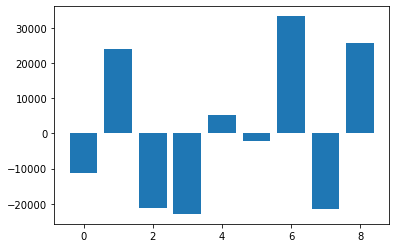

In [16]:
# Plot the importances
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.savefig('feature_importance_w_pricecut.jpg')
pyplot.show()

## Alternative Model
Removing negative important features to check accuracy of model


In [95]:
# Remove Features 2, 3, 7 which are: 
# civilian_labor_force, employment, and sales count
# Create our features
y = housing_data_cleaned["med_house_price"]
X = housing_data_cleaned.drop(columns=["med_house_price","region_desc","week","civilian_labor_force","employment","sales_count"]) # TBD based on factors to pull in
X.head(10) #Confirm Out has med_house_price dropped? =Yes

,region_id,sales_inventory,unemployment,unemployment_rate,rent_index,price_cut
0,394463,38581,209884.0,4.2,1610.46,9100.0
1,394463,42253,204092.0,4.1,1622.52,10000.0
2,394463,45757,200450.0,4.0,1634.70,10000.0
3,394463,47492,198869.0,4.0,1645.26,9652.5
4,394463,48984,198473.0,4.0,1651.54,9000.0
5,394463,49782,199432.0,4.0,1650.94,7000.0
6,394463,49630,201585.0,4.1,1643.64,7500.0
7,394463,48916,204618.0,4.1,1632.04,6000.0
8,394463,46495,208640.0,4.2,1623.91,5400.0
9,394463,42304,212919.0,4.3,1618.47,5000.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# Create the scaler instance
scaler = StandardScaler().fit(X_train)
#Fitting the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#Rerun resampling model
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
#Refit the resampled model
model.fit(X_resampled,y_resampled)

# Re-calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.7470926376205864

#### Conclusion From Alternative Model
Accuracy is slightly lower. Features brought in are not very impactful to the model but give a little more accuracy

### Visualization of Model
Utilizing 2D Model of Single Variable and 3D Model of top variables

In [34]:
# Define X and Y for single variable visualization
# Utilizing highest variable importance
homePrice = housing_data_cleaned["med_house_price"].values
rent = housing_data_cleaned["price_cut"].values.reshape(-1,1)

In [35]:
#Build model with single variable
sv_model = model.fit(rent,homePrice)
response = sv_model.predict(rent)

In [36]:
#Evaluate sv model
r2sv = sv_model.score(rent, homePrice)

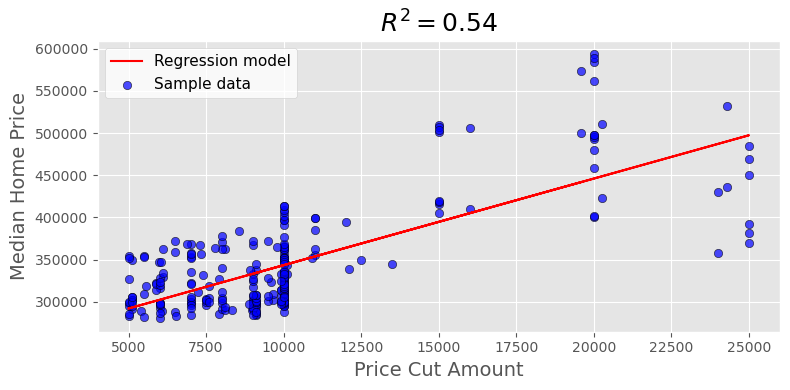

In [41]:
# Plot with above
from matplotlib.pyplot import savefig


plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(rent, response, color='r', label='Regression model')
ax.scatter(rent, homePrice, edgecolor='k', facecolor='blue', alpha=0.7, label='Sample data')
ax.set_ylabel('Median Home Price', fontsize=14)
ax.set_xlabel('Price Cut Amount', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2sv, fontsize=18)
fig.tight_layout()
savefig('2DLinearPriceCut.png')

In [90]:
# Build 3D chart for top features
# Prepare the Data

X = housing_data_cleaned[["rent_index","price_cut"]].values.reshape(-1,2)
Y = housing_data_cleaned["med_house_price"].values

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(1200, 2000, 50)   # Range of rent values
y_pred = np.linspace(5000, 25000, 50)  # Range of price cut
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#Build model with single variable
threed_model = model.fit(X,Y)
predicted = threed_model.predict(model_viz)

#Evaluate sv model
r2threed = threed_model.score(X, Y)

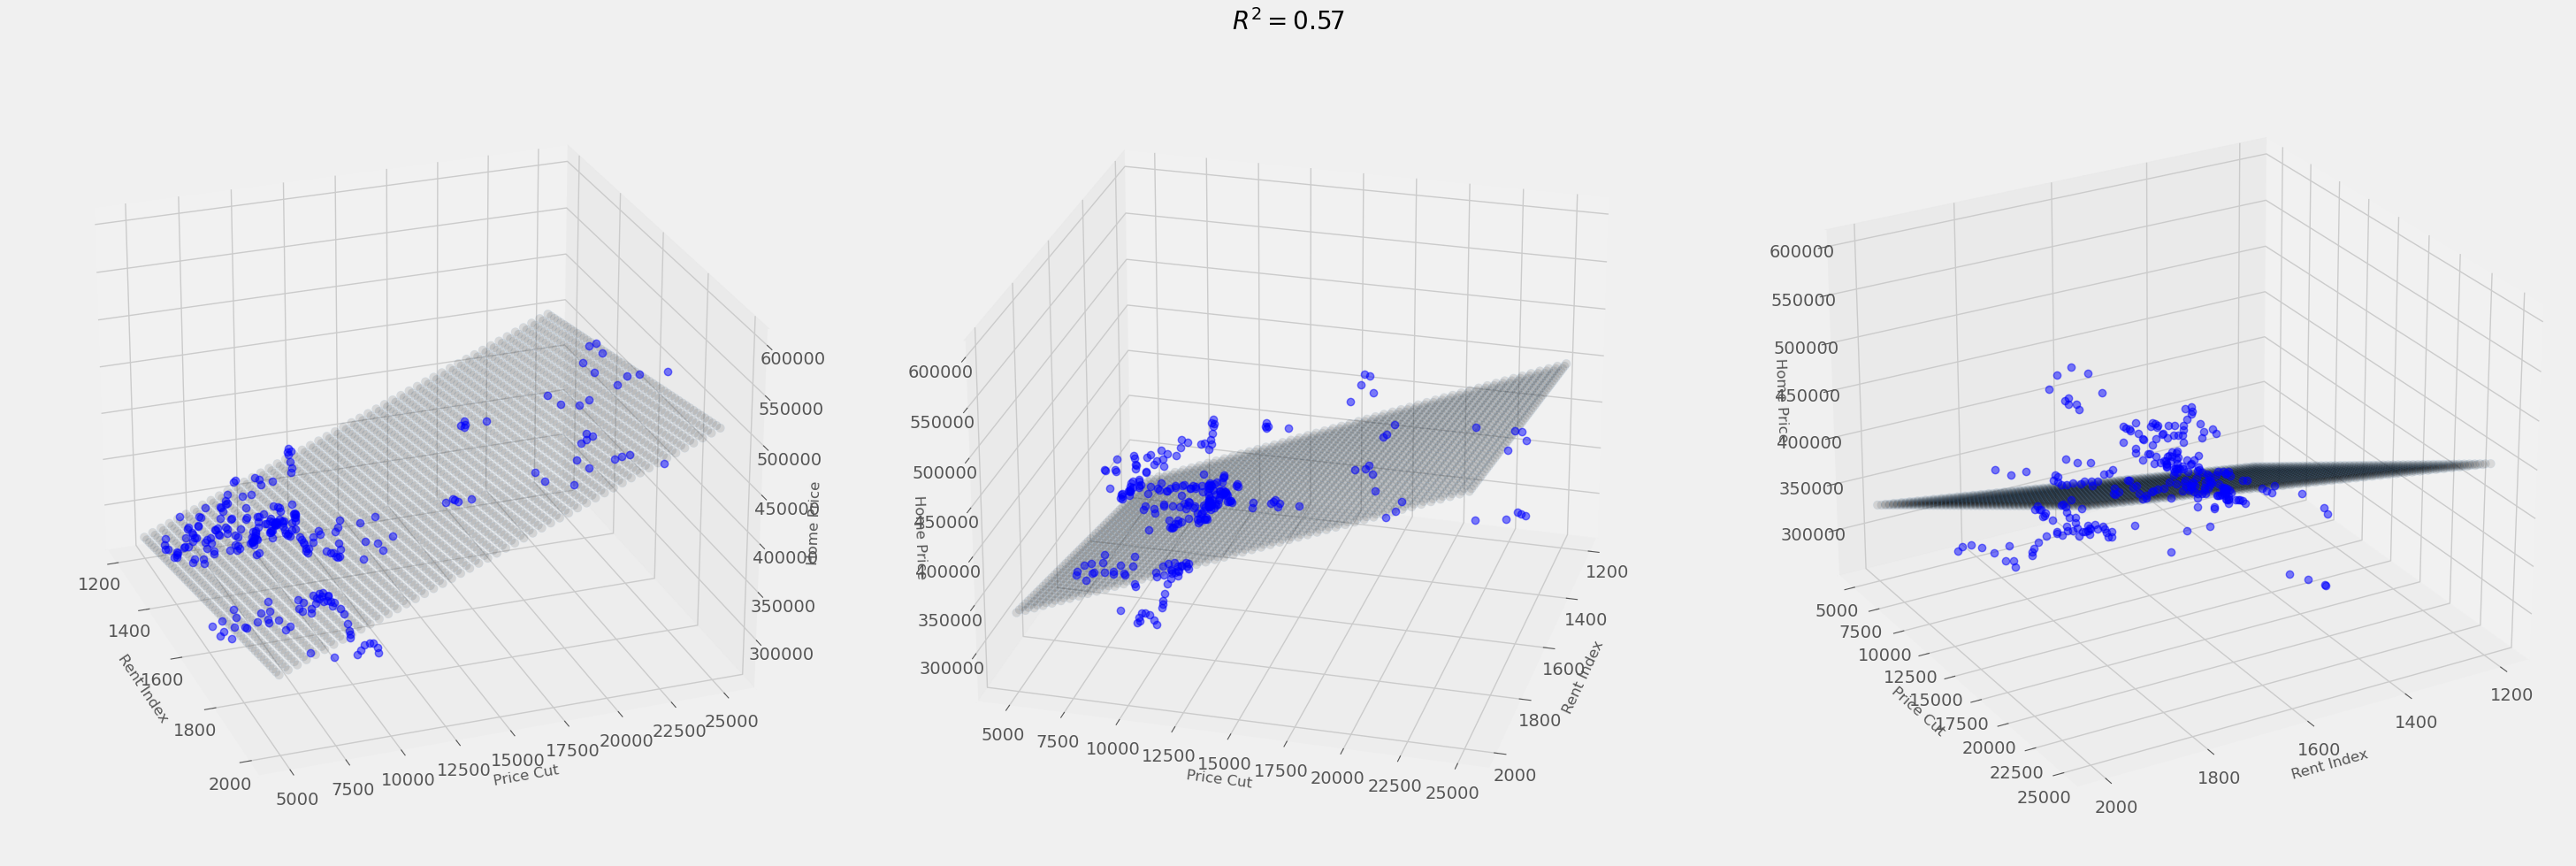

In [91]:
# Plot with above
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='b', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=50, edgecolor='#70b3f0', alpha=0.10)
    ax.set_xlabel('Rent Index', fontsize=12)
    ax.set_ylabel('Price Cut', fontsize=12)
    ax.set_zlabel('Home Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=2500)
ax2.view_init(elev=25, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('$R^2 = %.2f$' % r2threed, fontsize=20)

fig.tight_layout()
savefig('3DLinear.png')

In [93]:
# Export Images for Gif maker to rotate ONLY use on final graph
# Commented out until needed produces 360 images to the images folder

#for ii in np.arange(0, 360, 1):
#    ax.view_init(elev=32, azim=ii)
#    fig.savefig('..\images\gif_images\gif_image%d.png' % ii)

##### Review Accuracy with Adjusted R2 (OLS)

In [46]:
X = housing_data_cleaned.drop(columns=["med_house_price","region_desc","week","civilian_labor_force","employment","sales_count"])
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(housing_data_cleaned['med_house_price'], X).fit()
savefig('olssummary.jpg')
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:        med_house_price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           3.92e-82
Time:                        11:55:08   Log-Likelihood:                -3124.5
No. Observations:                 267   AIC:                             6263.
Df Residuals:                     260   BIC:                             6288.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.105e+07   3.82e+0

<Figure size 640x480 with 0 Axes>